# A Quantitative Approach to Product Market Fit with Python

This a Python implementation of the Quantitative Approach defined by Tribe Capital to asses Product Market Fit. You can find their article [here](https://tribecap.co/a-quantitative-approach-to-product-market-fit/). You can find more about this implementation [here]().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from IPython.display import display
import seaborn as sns

from growth_accounting_pmf import GrowthAccounting
from cohorts_pmf import Cohorts

## The data
We are using two datasets of 2020 from *Spot the lion* App. You can find more about the app [here]().
- *spot_the_lion_user_activity*: contains **user interactions** with the app.
    - *Spot* is the action of locating a lion in the map.
    - *Confirm* is the action of confirming the lion in the map is already there. 
    - *Take a look* is the action of searching in the map.
- *spot_the_lion_revenue*: includes **user payments** inside de app. These payments are safe places bookings by users.

In [2]:
activity=pd.read_csv('spot_the_lion_user_activity.csv')
activity['date']=pd.to_datetime(activity['date'])
activity.head()

,date,user_id,action
0,2020-01-01,296,Confirm
1,2020-01-01,312,Take a look
2,2020-01-01,312,Take a look
3,2020-01-01,312,Take a look
4,2020-01-01,312,Take a look


In [3]:
activity.nunique()

date        366
user_id    1472
action        3
dtype: int64

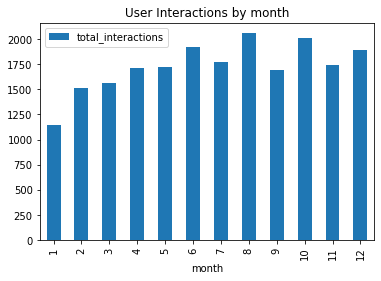

In [4]:
activity['month']=activity['date'].dt.month
activity.groupby('month')[['user_id']].count().rename(columns={'user_id':'total_interactions'}).plot(kind='bar')
plt.title('User Interactions by month')
plt.show()

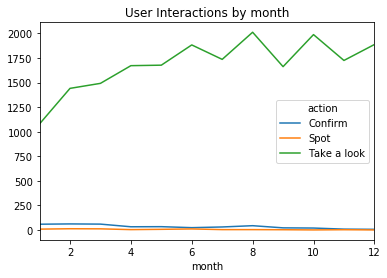

In [5]:
activity['month']=activity['date'].dt.month
act_cat=activity.groupby(['month','action'])[['user_id']].count().rename(columns={'user_id':'total_interactions'})
act_cat['total_interactions'].unstack().plot()
plt.title('User Interactions by month')
plt.show()

In [6]:
revenue=pd.read_csv('spot_the_lion_revenue.csv')
revenue['date']=pd.to_datetime(revenue['date'])
revenue.head()

,date,user_id,revenue
0,2020-01-01,296,34.50
1,2020-01-01,172,45.99
2,2020-01-01,250,106.84
3,2020-01-01,279,57.50
4,2020-01-01,279,77.07


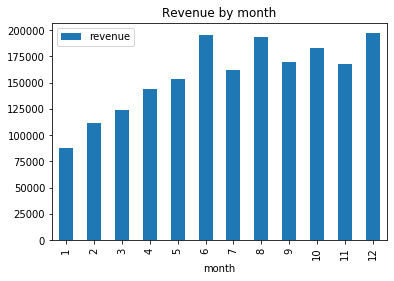

In [7]:
revenue['month']=revenue['date'].dt.month
revenue.groupby('month')[['revenue']].sum().plot(kind='bar')
plt.title('Revenue by month')
plt.show()

## Growth Accounting

### Growth Accounting for User Interactions

In [64]:
user_growth=GrowthAccounting(period='M')

In [65]:
user_growth.fit(activity,'date','user_id')

Preparing the data...
Computing Growth Accounting...
Done!


In [66]:
user_growth.df

,total,new,resurrected,expansion,contraction,retained,churned,new_rate,resurrected_rate,expansion_rate,retained_rate,churned_rate,growth_rate,gross_retention,quick_ratio,net_churn
cohort_rep,,,,,,,,,,,,,,,,
2020-01-01,1148.0,1148.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,1516.0,1220.0,0.0,33.0,-587.0,263.0,-298.0,1.062718,NaN,NaN,NaN,NaN,NaN,0.229094,1.415819,0.742160
2020-03-01,1564.0,1174.0,23.0,48.0,-750.0,319.0,-447.0,0.962295,NaN,1.454545,1.212928,1.500000,NaN,0.210422,1.040100,0.742744
2020-04-01,1709.0,1173.0,67.0,72.0,-672.0,397.0,-495.0,0.999148,2.913043,1.500000,1.244514,1.107383,3.408809,0.253836,1.124250,0.657289
2020-05-01,1718.0,1242.0,62.0,42.0,-763.0,372.0,-574.0,1.058824,0.925373,0.583333,0.937028,1.159596,0.272517,0.217671,1.006731,0.721475
2020-06-01,1918.0,1272.0,159.0,68.0,-712.0,419.0,-587.0,1.024155,2.564516,1.619048,1.126344,1.022648,3.251912,0.243888,1.153965,0.623981
2020-07-01,1771.0,1158.0,116.0,66.0,-836.0,431.0,-651.0,0.910377,0.729560,0.970588,1.028640,1.109029,0.327339,0.224713,0.901143,0.680396
2020-08-01,2060.0,1319.0,191.0,82.0,-806.0,468.0,-497.0,1.139033,1.646552,1.242424,1.085847,0.763441,2.300453,0.264257,1.221796,0.581592
2020-09-01,1687.0,1075.0,111.0,62.0,-802.0,439.0,-819.0,0.815011,0.581152,0.756098,0.938034,1.647887,-0.490664,0.213107,0.769895,0.702913


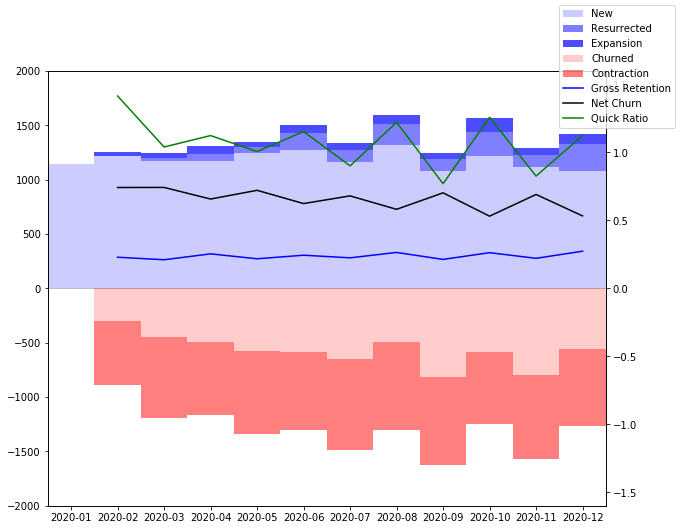

In [67]:
user_growth.plot()

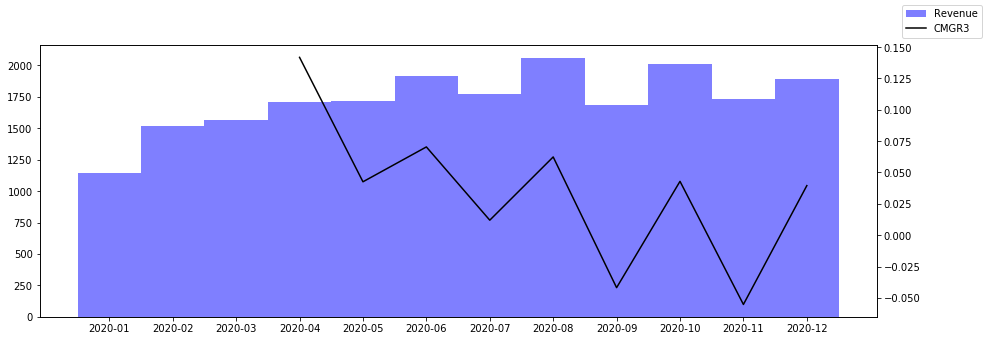

In [68]:
user_growth.plot_compound_growth(3)

### Growth Accounting for Users Confirming lions

In [84]:
confirms=activity[activity['action']=='Confirm']

In [85]:
conf_growth=GrowthAccounting(period='M')

In [88]:
conf_growth.fit(confirms,'date','user_id')

Preparing the data...
Computing Growth Accounting...
Done!


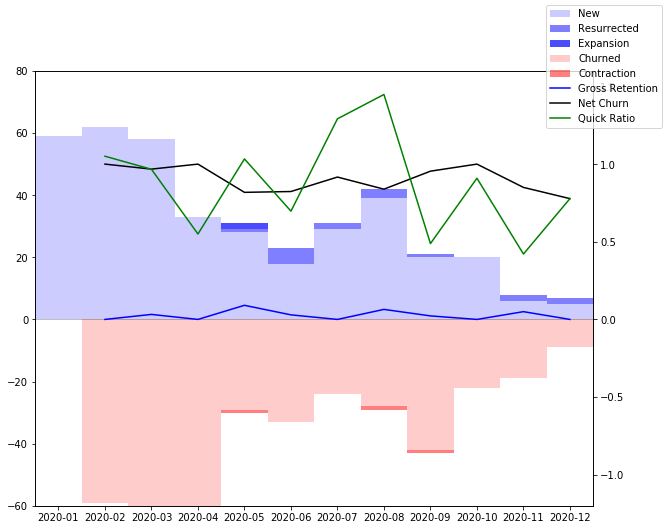

In [89]:
conf_growth.plot()

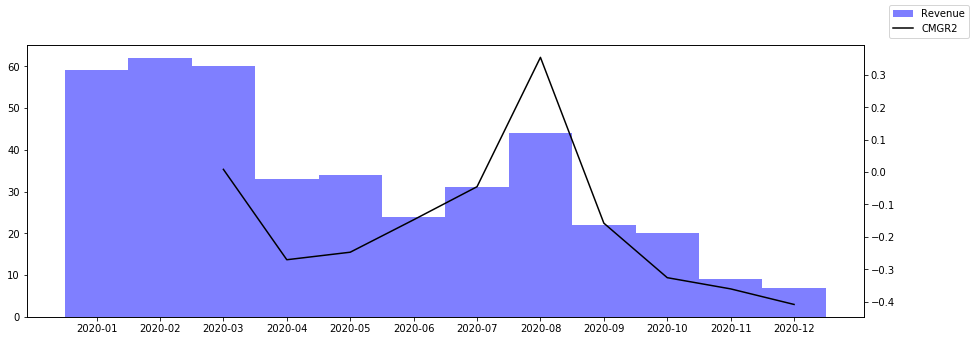

In [91]:
conf_growth.plot_compound_growth(2)

### Growth Accounting for revenue

In [97]:
rev_growth=GrowthAccounting(period='M',simple=False)

In [98]:
rev_growth.fit(revenue,'date','user_id','revenue')

Preparing the data...
Computing Growth Accounting...
Done!


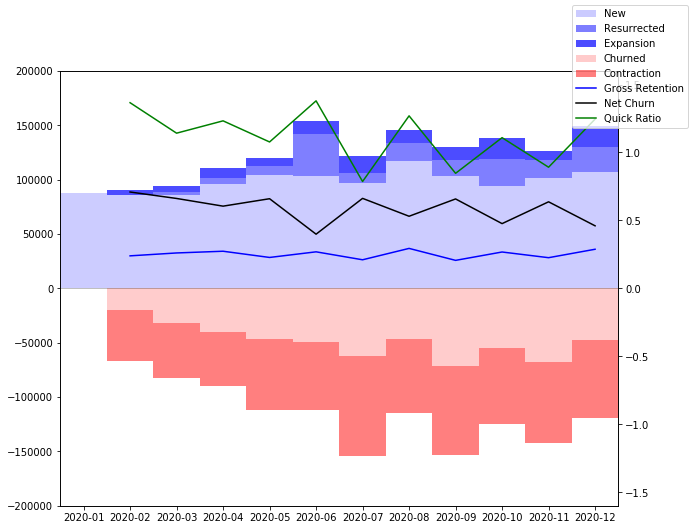

In [99]:
rev_growth.plot()

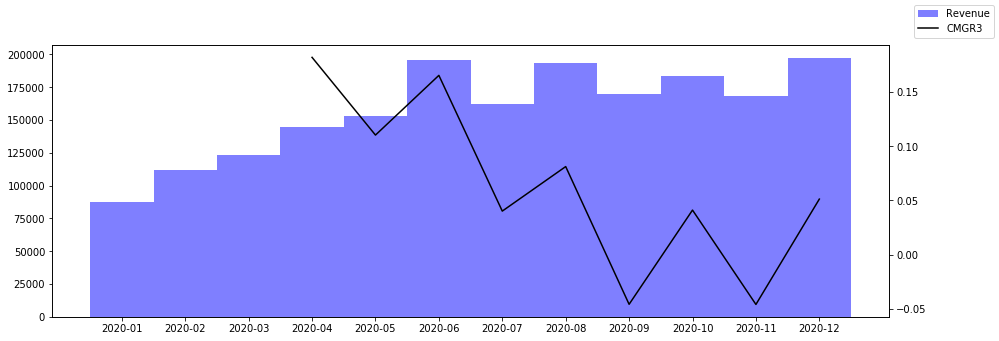

In [101]:
rev_growth.plot_compound_growth(3)

## Cohorts

### Activity cohorts

In [8]:
users_cohort=Cohorts(period='M')

In [9]:
users_cohort.fit(activity,'date','user_id',how=['total','churn_total','unique_users','churn_unique_users','per_user'])


In [10]:
users_cohort.df_cohorts.head()

,cohort,period,period_num,total,perc_total,churn_total,perc_churn_total,unique_users,perc_unique_users,churn_unique,perc_churn_unique,per_user,perc_per_user
0,2020-01-01,2020-01-01,0,1148,1.00000,0,0.00000,172,1.000000,0,0.000000,6.674419,1.000000
1,2020-01-01,2020-02-01,1,296,0.25784,852,0.74216,113,0.656977,59,0.343023,2.619469,0.392464
2,2020-01-01,2020-03-01,2,185,0.16115,963,0.83885,84,0.488372,88,0.511628,2.202381,0.329973
3,2020-01-01,2020-04-01,3,148,0.12892,1000,0.87108,73,0.424419,99,0.575581,2.027397,0.303756
4,2020-01-01,2020-05-01,4,83,0.07230,1065,0.92770,57,0.331395,115,0.668605,1.456140,0.218167


#### Total Interactions Cohorts

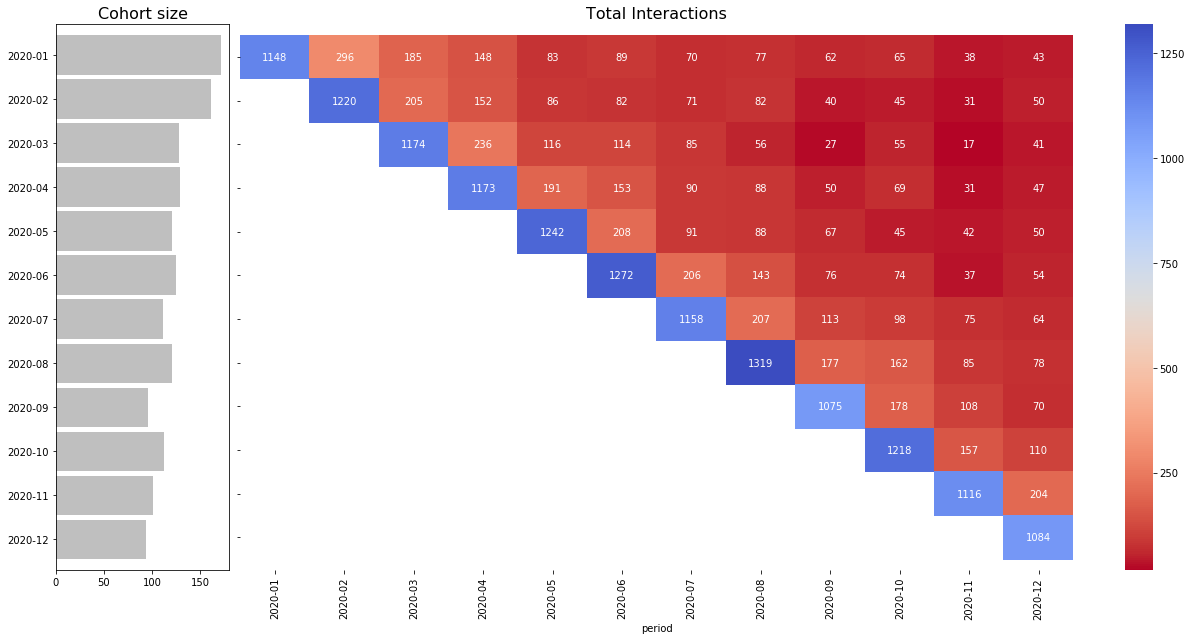

In [11]:
users_cohort.plot_heatmap('total','Total Interactions',way='period')

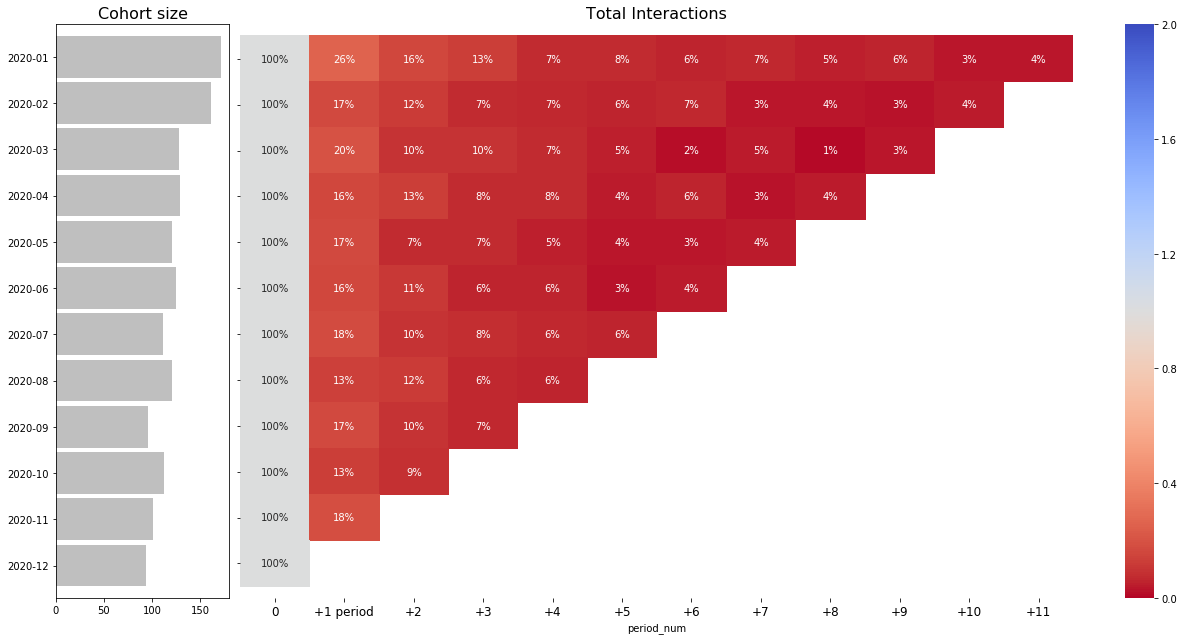

In [12]:
users_cohort.plot_heatmap('perc_total','Total Interactions',way='period_num')

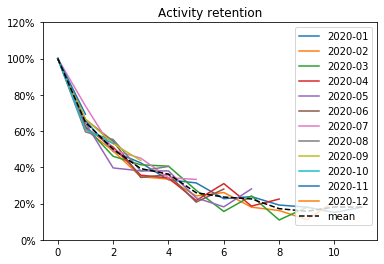

In [13]:
users_cohort.plot_trends('perc_unique_users','Activity retention',way='period_num')

#### Unique users cohort

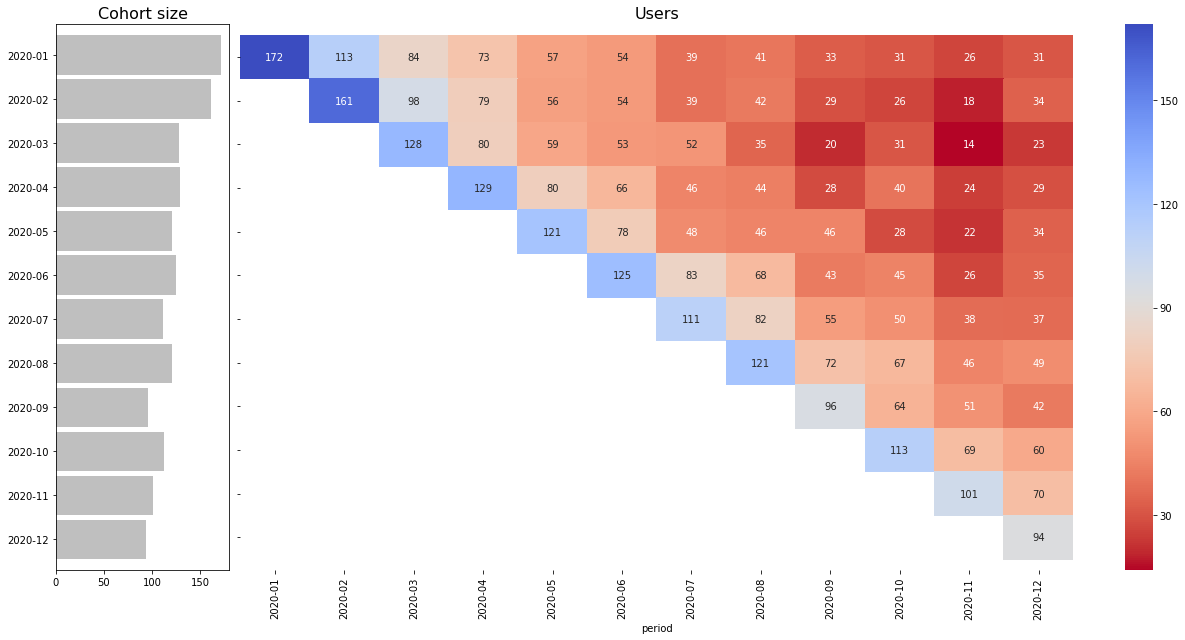

In [14]:
users_cohort.plot_heatmap('unique_users','Users',way='period')

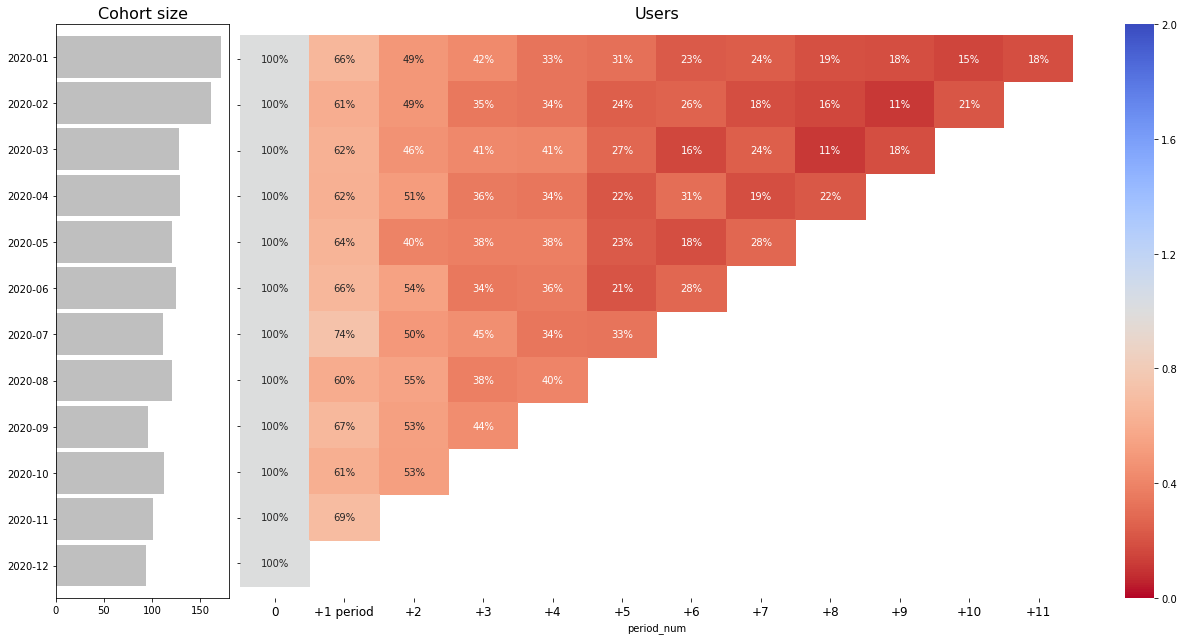

In [15]:
users_cohort.plot_heatmap('perc_unique_users','Users',way='period_num')

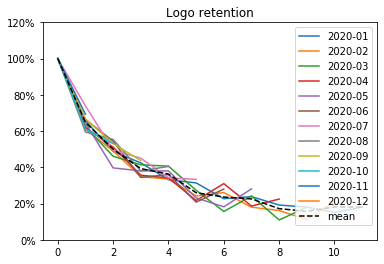

In [16]:
users_cohort.plot_trends('perc_unique_users','Logo retention',way='period_num')

#### Users churn cohorts

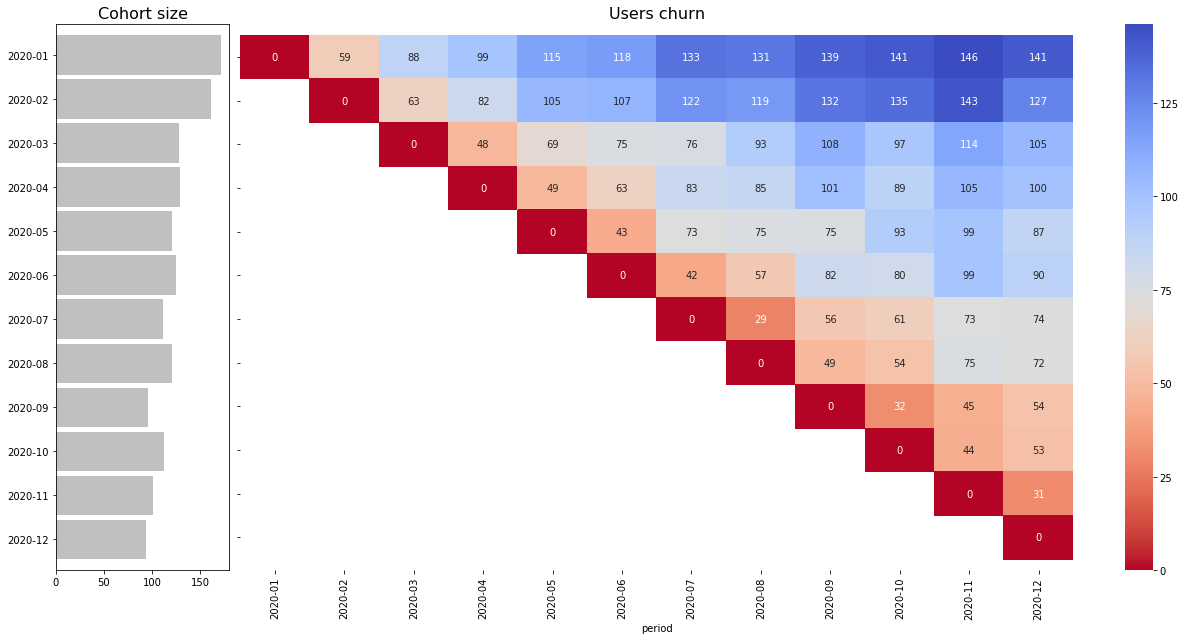

In [17]:
users_cohort.plot_heatmap('churn_unique','Users churn',way='period')

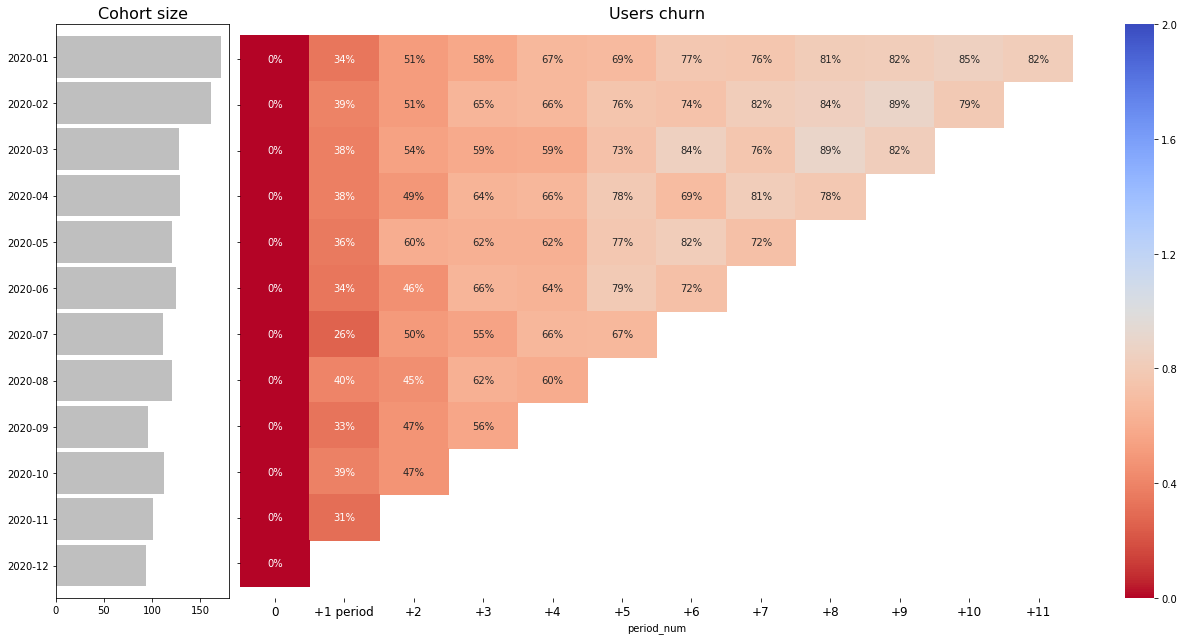

In [18]:
users_cohort.plot_heatmap('perc_churn_unique','Users churn',way='period_num')

#### Interactions per user cohorts

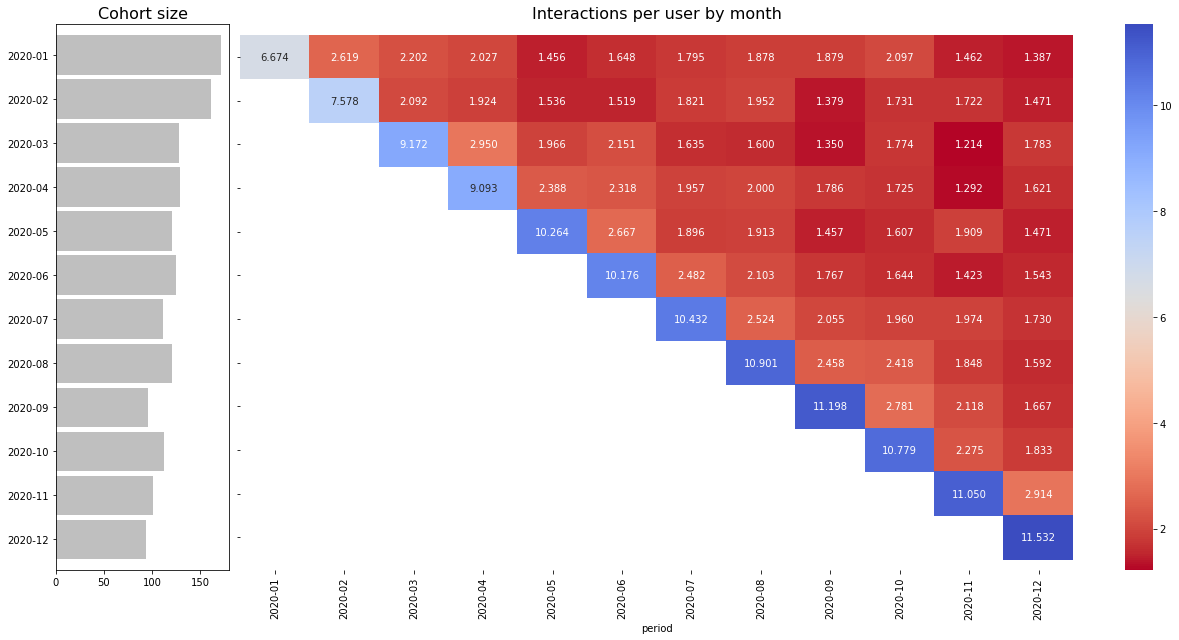

In [19]:
users_cohort.plot_heatmap('per_user','Interactions per user by month',way='period')

#### Retention by type of interaction

In [20]:
look_cohort=Cohorts(period='q')
confirm_cohort=Cohorts(period='q')
spot_cohort=Cohorts(period='q')

In [21]:
look_cohort.fit(activity[activity['action']=='Take a look'],'date','user_id',how=['unique_users'])
confirm_cohort.fit(activity[activity['action']=='Confirm'],'date','user_id',how=['unique_users'])
spot_cohort.fit(activity[activity['action']=='Spot'],'date','user_id',how=['unique_users'])

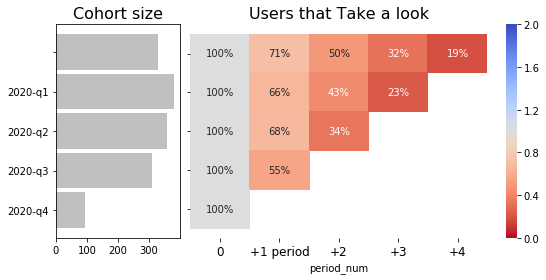

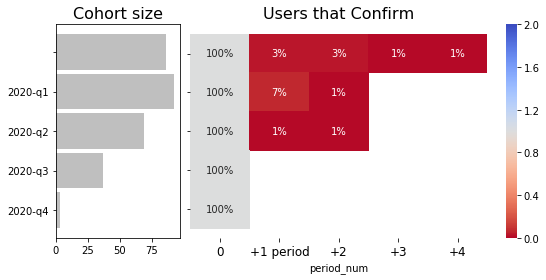

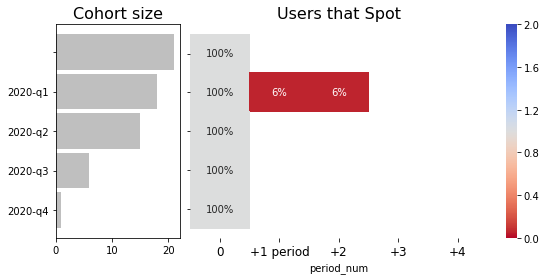

In [22]:
look_cohort.plot_heatmap('perc_unique_users','Users that Take a look',way='period_num')
confirm_cohort.plot_heatmap('perc_unique_users','Users that Confirm',way='period_num')
spot_cohort.plot_heatmap('perc_unique_users','Users that Spot',way='period_num')

#### Different types of interactions by user (Variety)

In [23]:
users_cohort.df_period_cohort.head()

,user_id,date,action,month,unique_id,column_input,period,cohort
0,296,2020-01-01,Confirm,1,0,1,2020-01-01,2020-01-01
1,312,2020-01-01,Take a look,1,1,1,2020-01-01,2020-01-01
2,312,2020-01-01,Take a look,1,2,1,2020-01-01,2020-01-01
3,312,2020-01-01,Take a look,1,3,1,2020-01-01,2020-01-01
4,312,2020-01-01,Take a look,1,4,1,2020-01-01,2020-01-01


In [24]:
new_df=users_cohort.df_period_cohort
new_df['cohort']=pd.to_datetime(new_df['cohort'])
new_df['period']=pd.to_datetime(new_df['period'])
new_df=new_df.groupby(['cohort','period','user_id'])[['action']].nunique().rename(columns={'action':'variety'})
new_df

variety
cohort     period     user_id         
2020-01-01 2020-01-01 9              1
                      10             1
                      16             1
                      51             1
                      59             1
...                                ...
2020-12-01 2020-12-01 1533           2
                      1534           1
                      1535           1
                      1536           1
                      1537           1

[4707 rows x 1 columns]

In [25]:
new_df=new_df.reset_index().groupby(['cohort','period'])[['variety']].mean().reset_index()
new_df

,cohort,period,variety
0,2020-01-01,2020-01-01,1.267442
1,2020-01-01,2020-02-01,1.000000
2,2020-01-01,2020-03-01,1.000000
3,2020-01-01,2020-04-01,1.027397
4,2020-01-01,2020-05-01,1.000000
...,...,...,...
73,2020-10-01,2020-11-01,1.000000
74,2020-10-01,2020-12-01,1.000000
75,2020-11-01,2020-11-01,1.069307
76,2020-11-01,2020-12-01,1.000000


In [26]:
users_cohort.apply_personalized(new_df,'variety')

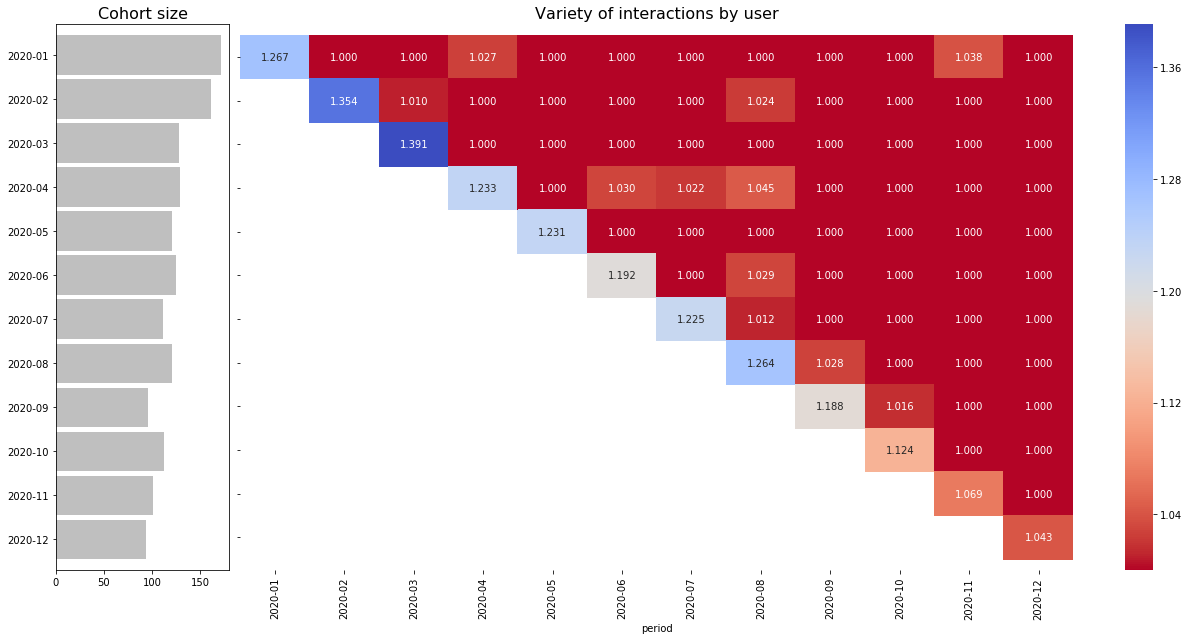

In [27]:
users_cohort.plot_heatmap('variety','Variety of interactions by user',way='period')

### Revenue Cohorts

In [29]:
revenue_cohort=Cohorts(period='M',simple=False)

In [30]:
revenue_cohort.fit(revenue,'date','user_id','revenue',how=['total','churn_total','accum','per_user'])


#### Total revenue by cohort

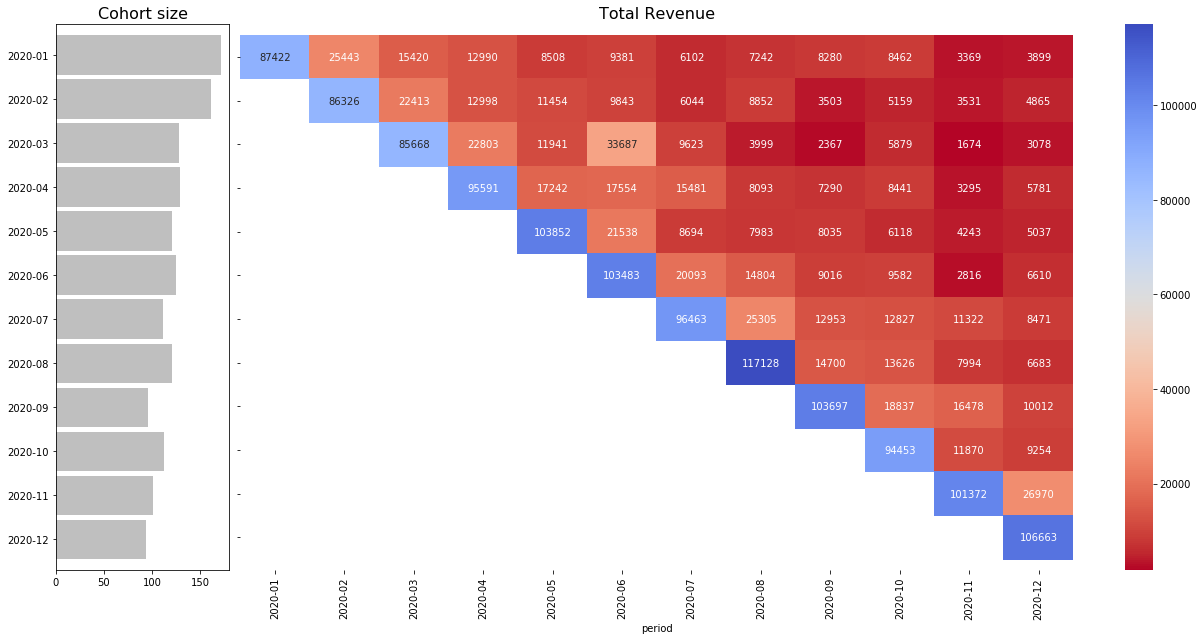

In [31]:
revenue_cohort.plot_heatmap('total','Total Revenue',way='period')

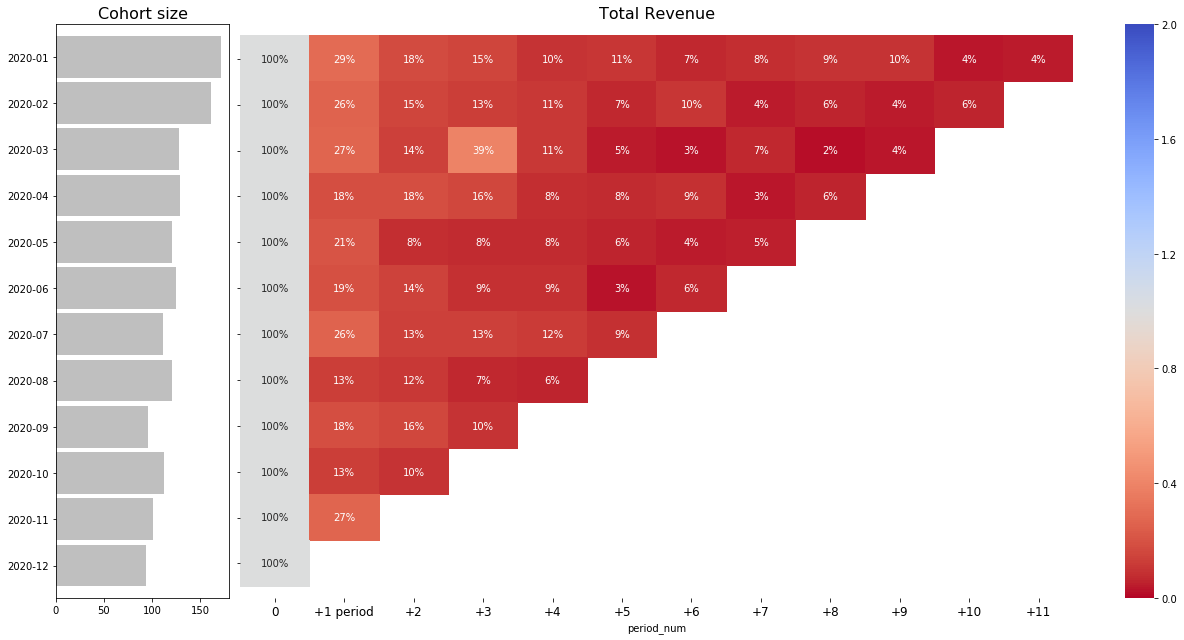

In [32]:
revenue_cohort.plot_heatmap('perc_total','Total Revenue',way='period_num')

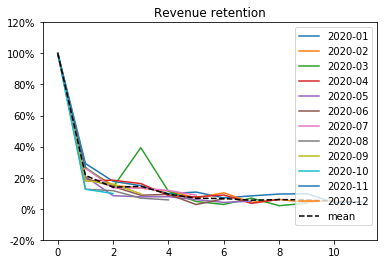

In [33]:
revenue_cohort.plot_trends('perc_total','Revenue retention',way='period_num')

#### Revenue per user

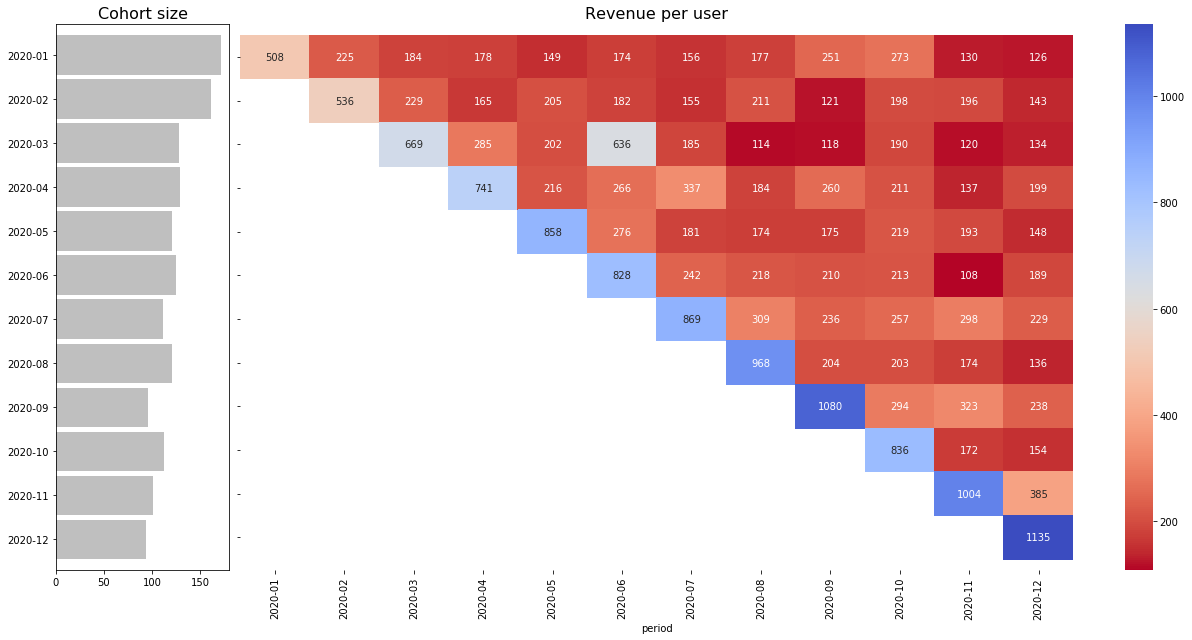

In [34]:
revenue_cohort.plot_heatmap('per_user','Revenue per user',way='period')

#### LTV by cohort

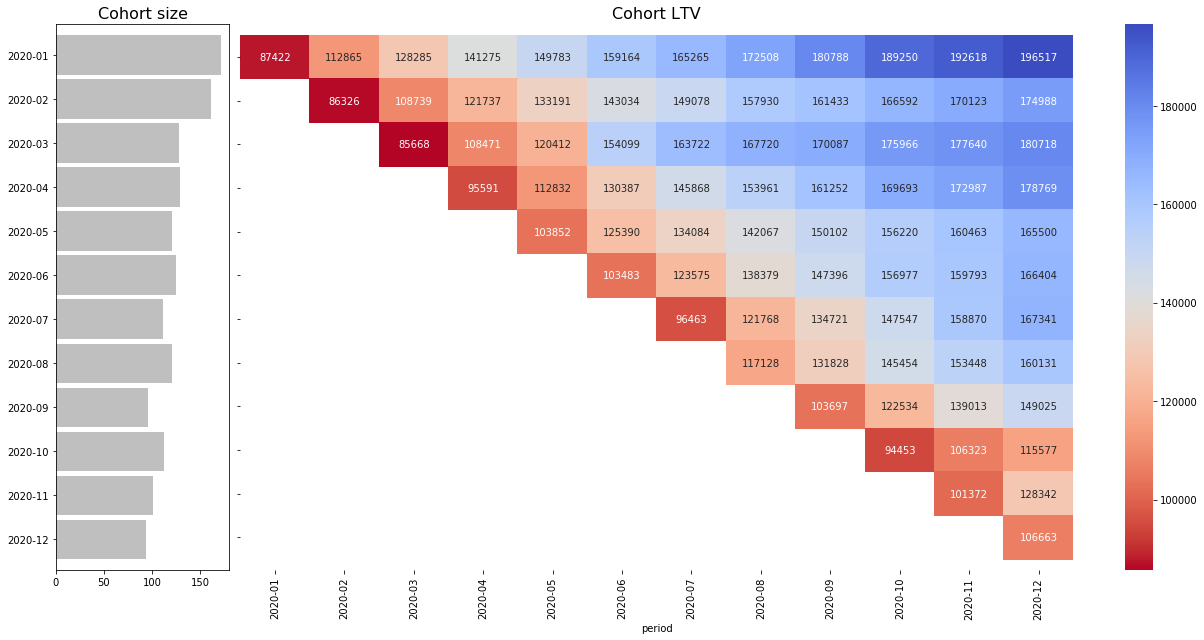

In [35]:
revenue_cohort.plot_heatmap('accum','Cohort LTV',way='period')

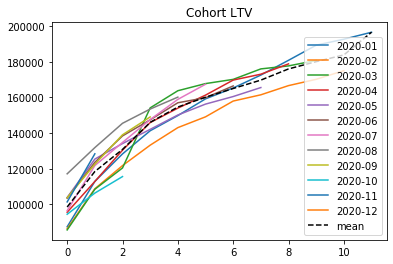

In [36]:
revenue_cohort.plot_trends('accum','Cohort LTV',way='period_num')

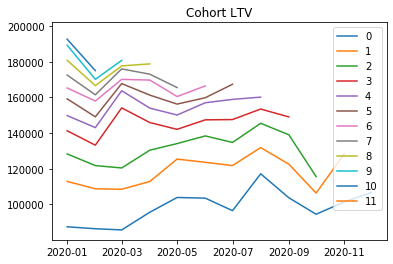

In [37]:
revenue_cohort.plot_trends('accum','Cohort LTV',way='age')